<a href="https://colab.research.google.com/github/drpetros11111/FS_DScML_Zero_to_Mastery/blob/20_Python_Scikit-learn-0-to-mastery/5_Choosing_Estim_Classification_Regress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
heart_disease = pd.read_csv('/content/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


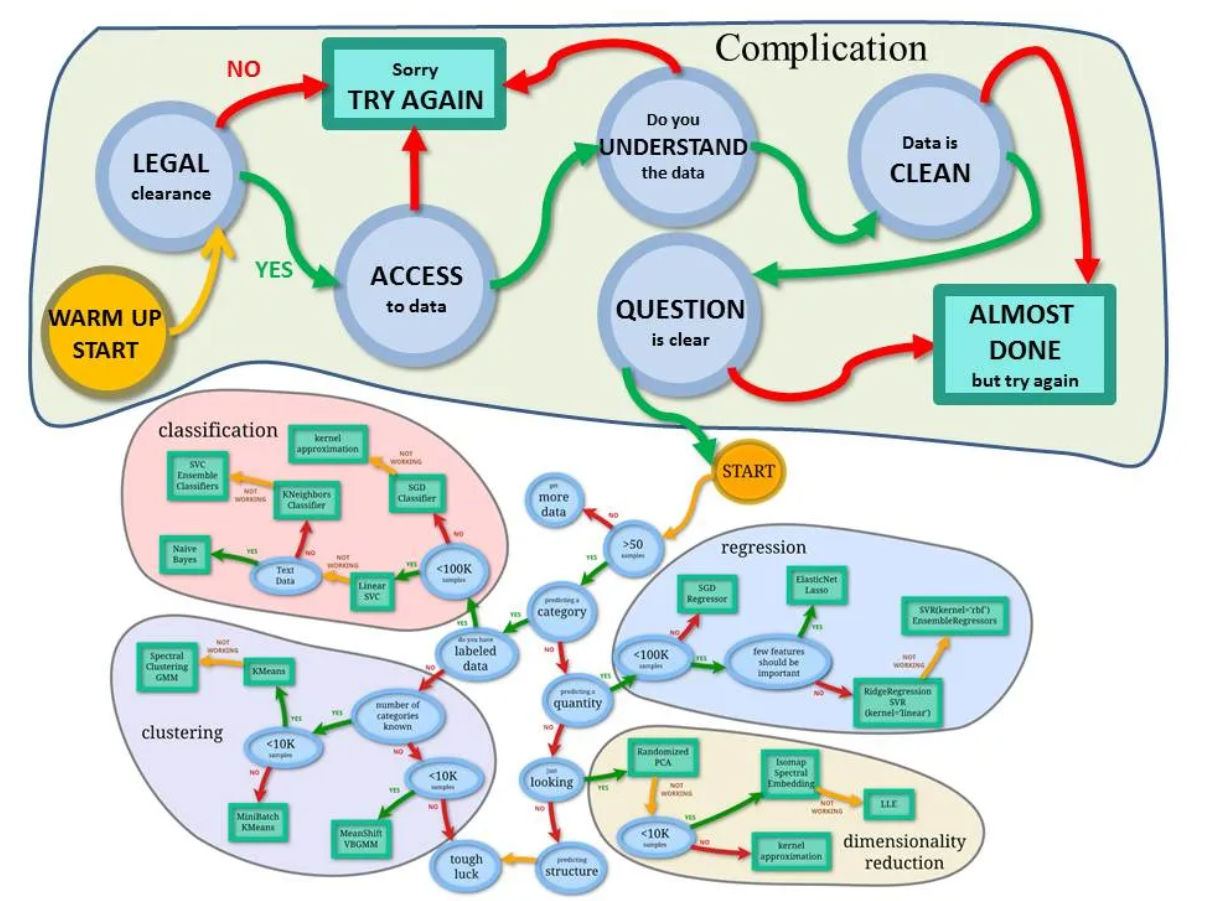

In [ ]:
len(heart_disease)

303

In [ ]:
''' Following the Map

1. Do we have more than 50 samples = Yes, we have 303
2. A we predicting a category = Yes, a patient has heart disease or NOT
3. Do we have labeled data = Yes,
4. Do we have less than 100K samples = Yes
5. The try Linear SVC'''


**A linear SVC (Support Vector Classifier)**

is a machine learning algorithm used for binary classification tasks.

**It belongs to the family of Support Vector Machines (SVMs) and is specifically designed for linearly separable data.**

The goal of a linear SVC is to find the best hyperplane that separates the two classes in a dataset.

A hyperplane in this context is a high-dimensional plane that acts as a decision boundary between the classes.

**The linear SVC algorithm determines the optimal hyperplane by maximizing the margin, which is the distance between the hyperplane and the nearest data points from each class.**

**The "linear" in the linear SVC refers to the fact that it uses a linear kernel, which assumes that the data is linearly separable in the input space.**

The linear kernel computes the dot product between feature vectors, and it **is well-suited for problems where the classes can be separated by a straight line or a hyperplane**.

To train a linear SVC, the algorithm aims to find the parameters (weights and bias) that define the hyperplane.


It solves an optimization problem by minimizing the classification error while maximizing the margin.

This process involves finding the support vectors, which are the data points closest to the decision boundary.

Once trained, a linear SVC can be used to predict the class labels of new, unseen data points by evaluating which side of the hyperplane they fall on.

Linear SVCs have several advantages, including good generalization performance, ability to handle high-dimensional data, and computational efficiency.

However, they may not perform well on datasets that are not linearly separable, as they cannot capture complex nonlinear relationships between the features and the target variable.

**In such cases, nonlinear SVMs with different kernel functions (e.g., polynomial or radial basis function) are more suitable.**



---
**Note**
In a linear SVC, the hyperplane refers to the decision boundary that separates the two classes in a linearly separable dataset. In a two-dimensional space, the hyperplane is a line, while in higher-dimensional spaces, it becomes a hyperplane.

The linear SVC algorithm finds the optimal hyperplane by maximizing the margin between the classes. The margin is the distance between the hyperplane and the nearest data points from each class. By maximizing the margin, the linear SVC aims to create a decision boundary that has the largest possible separation between the classes.

The hyperplane is crucial because it defines the classification rule. Any new data point can be classified based on which side of the hyperplane it falls on. If it falls on one side, it belongs to one class, and if it falls on the other side, it belongs to the other class.

**To summarize, the hyperplane in a linear SVC is the decision boundary that separates the classes, and it determines how the classifier assigns class labels to new data points based on their position relative to the hyperplane.**


In [11]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
#Import the Linear SVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

#Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

# Instantiate Linear SVC
clf = LinearSVC(max_iter = 100000)
clf.fit(X_train, y_train)

# Evaluate the Linear SVC
clf.score(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

**General Note:**
In Python, when working with pandas DataFrames, we typically use square brackets **([])** **to select a column by name.**

**To drop a column, we use the drop()** method and pass the column name as a string inside the parentheses.

T**o select a column from a DataFrame using square brackets**, you would use the following syntax:

**df['column_name']**

For example, if you have a DataFrame named df and you want to select the column named "column_name", you would write:

**selected_column = df['column_name']**

To drop a column from a DataFrame, you would use the drop() method and pass the column name as a string inside the parentheses. Here's an example:

**df.drop('column_name', axis=1, inplace=True)**

The axis=1 parameter indicates that we want to drop a column, and inplace=True modifies the original DataFrame. If you set inplace=False or omit it, a new DataFrame without the dropped column will be returned, leaving the original DataFrame unchanged.


---


So, in summary:

**To select a column, use square brackets ([]) with the column name inside: df['column_name'].
To drop a column, use the drop() method and pass the column name as a string: df.drop('column_name', axis=1, inplace=True)**.

##Using the RandomForest Classifier to improve the score

Random Forest is known to perform well in many machine learning tasks due to several reasons:

**Ensemble of Decision Trees**

Random Forest is an ensemble algorithm that combines multiple decision trees to make predictions.

Each decision tree in the ensemble is built on a different subset of the training data and uses a random subset of features for splitting.

**By combining the predictions of multiple trees, Random Forest reduces the risk of overfitting and improves the model's generalization ability.**


---


**Handling Nonlinear Relationships:**

Decision trees are capable of learning nonlinear relationships between features and the target variable.

By using an ensemble of decision trees, Random Forest can capture complex nonlinear relationships and interactions among features, making it more flexible and powerful than individual decision trees.


---


**Reduced Variance**

Random Forest reduces the variance of individual decision trees **by averaging their predictions**.

This helps to mitigate the problem of high variance and unstable predictions often associated with single decision trees.


---


**Implicit Feature Selection**

Random Forest performs implicit feature selection by randomly selecting a subset of features at each split.

This random feature selection helps to decorrelate the trees and ensures that each tree makes its decisions based on a different set of features.

This randomness reduces the chances of the model relying too heavily on a single dominant feature and improves the overall performance.


---


**Robust to Overfitting**

Random Forest is less prone to overfitting compared to individual decision trees.

The ensemble nature of Random Forest, along with its random feature selection and bootstrap aggregating (bagging), **helps to reduce overfitting by averaging out the biases and errors of individual trees**.


---


**Outlier Robustness**

Random Forest is generally robust to outliers in the dataset.

Outliers have less influence on the final predictions because they tend to affect only a subset of the decision trees rather than the entire ensemble.


---


**Handle High-Dimensional Data**

Random Forest can handle high-dimensional datasets without much feature engineering or dimensionality reduction. The random feature selection and averaging of predictions help to handle a large number of features effectively.


---


However, it's worth noting that the performance of Random Forest may vary depending on the specific dataset and the hyperparameters used.

It is always recommended to experiment with different algorithms and parameter settings to find the best model for a particular task.

**Bootstrap aggregating**

Commonly referred to as **bagging**, is a technique used in machine learning to improve the stability and generalization of models.

**Bagging involves creating multiple subsets of the original training data by sampling with replacement, training a separate model on each subset, and combining their predictions.**


---


Here's how the bagging process works:

**Data Sampling**

Given a training dataset of size N, bagging randomly selects a subset of the data with replacement, meaning that each subset can contain duplicate samples.

In bagging, **the size of the subsets (also known as bootstrap samples) is typically the same as the original dataset, but they are created by random sampling with replacement. **

This means that each subset is constructed by randomly selecting samples from the original dataset, allowing for duplicate samples to be included.


---


**Model Training**

For each subset, a separate model is trained using the chosen algorithm (e.g., decision trees, random forest, or any other base model).

Each model is trained independently on its corresponding subset.


---


**Prediction Combination**

Once all the models are trained, predictions are made using each model on the test data or new unseen data.

The final prediction is obtained by aggregating the individual predictions, usually by averaging (for regression) or voting (for classification).


---


The key idea behind bagging is that by creating multiple subsets and training separate models on each, the ensemble of models can capture different aspects of the data and reduce the variance associated with individual models. This helps to improve the model's generalization ability and reduce overfitting.

Bagging is commonly used with decision trees, resulting in the Random Forest algorithm, as each decision tree in the forest is trained on a different subset of the data. However, bagging is not limited to decision trees and can be applied to other algorithms as well.


---


The main benefits of bagging include:

**Reduced Variance:**

By training multiple models on different subsets of the data, bagging reduces the variance of the predictions compared to using a single model.

**Improved Stability:**

Bagging provides stability to the model by reducing the impact of outliers or noisy data points, as they may not appear in all the subsets used for training.

**Enhanced Generalization:**

By combining predictions from multiple models, bagging helps to improve the model's ability to generalize well to unseen data.



---


Overall, bagging is a powerful technique that can enhance the performance and stability of machine learning models, especially when applied to models with high variance or when dealing with complex datasets.

In [21]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

# Create the Data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Instantiate the RandomForest Classifier
clf = RandomForestClassifier(n_estimators = 100000)
clf.fit(X_train, y_train)

# Evaluate the Random Forest performance
clf.score(X_test, y_test)


0.8688524590163934

### Use Ensemble Classifiers or Regressions with structured data

The choice between ensemble classifiers/regressors and deep learning models depends on various factors, including the nature of the data, the problem you are trying to solve, the available resources, and the performance requirements.

It is not necessarily true that structured data should always be approached with ensemble methods, or that deep learning is exclusively suited for unstructured data.


---


Here are some considerations to help guide your decision:

**Data Complexity**

Ensemble methods, such as random forests or gradient boosting, can be effective for structured data with moderate complexity and well-defined features.

They are known for their ability to capture interactions between features and handle nonlinearity in the data.

**If your structured data has clear patterns and distinct features, ensemble methods can provide accurate predictions.**


---


**Data Size**

Ensemble methods can work well with relatively smaller datasets.

They are less prone to overfitting and can handle noise and outliers in the data.

Deep learning models, on the other hand, often require larger datasets to generalize effectively.

If you have a small dataset, ensemble methods may be a more suitable choice.


---


**Interpretability**

Ensemble methods, especially decision tree-based algorithms like random forests, provide interpretability by indicating feature importance and allowing you to understand the decision-making process. Deep learning models, such as neural networks, are typically more complex and often considered black boxes, making it challenging to interpret their internal workings.



---



**Resource Constraints**

Deep learning models, particularly deep neural networks, are computationally intensive and require significant computational resources, including processing power and memory. If you have limited computational resources, ensemble methods may be more feasible due to their relatively lower resource requirements.


---


**State-of-the-Art Performance**

Deep learning models have shown remarkable performance in various domains, including structured data tasks.

If you have a large dataset and want to push the boundaries of performance, especially in complex tasks like image recognition, natural language processing, or sequential data analysis, deep learning models can be a valuable choice.


---


It's important to note that these considerations provide general guidelines, but the choice between ensemble methods and deep learning ultimately depends on the specific problem and the available resources.

Experimentation and comparison of different approaches on your dataset are often necessary to determine the best model for your particular scenario.